In [1]:
# Name: Gabriel Citroni Uliana      NUSP: 9779367
# SSC0251 - 1st Semester - 2020
# Assignment 2: Image Enhancement and Fitering

import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
filename = str(input()).rstrip()
input_img = imageio.imread(filename).astype(float)
method = int(input())
save = int(input())

camera.png
1
0


In [3]:
#Gaussian Kernel, used on methods 1 and 3 
def G(x, sigma):
    result = (1/(2*np.pi*(sigma**2))) * np.exp(-(x**2)/(2*(sigma**2)))
    return abs(result)

#Bilateral Filter, used on method 1
def bilatteral_filter(input_img, n, r, s):
    gsi = np.zeros((n, n))
    result_img = np.zeros(input_img.shape)
    rows, cols = input_img.shape
    
    #get the center of the filter matrix
    a = int((n-1)/2)
    b = int((n-1)/2)
    
    #do the image padding
    pad_image = np.pad(input_img, (a , b), 'constant')
    
    #creating the filter matrix using the Spatial Gaussian
    for x in range(0, n):
        for y in range(0, n):
            i = np.sqrt((x-a)**2 + (y-b)**2)
            gsi[x,y] = G(i, s) #spatial gaussian

    for x in range(a, rows+a):     
        for y in range(b, cols+b):
            Wp = 0
            I_final = 0
            region_f = pad_image[x-a: x+(a+1), y-b: y+(b+1)]
            gri = G(region_f - pad_image[x,y], r) #range gaussian
            wi = np.multiply(gri, gsi)
            Wp = np.sum(wi)
            I_final = np.sum(np.multiply(wi, region_f))
            I_final = I_final/Wp
            result_img[x-a, y-b] = I_final

    return result_img

In [4]:
# Unsharp Mask filtering, used on method 2
def unsharp_mask_filter(input_img, c, kernel):
    k1 = ([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    k2 = ([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    rows, cols = input_img.shape
    I_filtered = np.zeros(input_img.shape)
    
    #do the image padding
    pad_image = np.pad(input_img, (1 , 1), 'constant')
    
    for x in range (1, rows+1):
        for y in range(1, cols+1):
            region_f = pad_image[x-1:x+2, y-1:y+2]
            if kernel == 1:
                I_filtered[x-1, y-1] = np.sum(np.multiply(region_f, k1))
            if kernel == 2:
                I_filtered[x-1, y-1] = np.sum(np.multiply(region_f, k2))
            
    #scaling the filtered image, using normalization
    v_min = np.min(I_filtered)
    v_max = np.max(I_filtered)
    I_filtered = (I_filtered - v_min)*255/(v_max - v_min)
    
    #adding the filtered image, multiplied by the parameter c, back to the original image
    output_img = (c*I_filtered) + input_img
    
    #scaling the final image, using normalization
    v_min = np.min(output_img)
    v_max = np.max(output_img)
    output_img = (output_img - v_min)*255/(v_max - v_min)

    return output_img

In [5]:
# Vignette Filter, used on method 3
def vignette_filter(input_img, s_row, s_col):
    N,M = input_img.shape
    
    #get the matrix center
    a = int(N/2 - 1)
    b = int(M/2 - 1)
    
    #build kernels for rows and cols
    Wrow = [[G(i-a, s_row) for i in range(0, N)] for j in range(0,1)]
    Wcol = [[G(i-b, s_col) for i in range(0, M)] for j in range (0,1)]
    #flip matix Wrow and multiply it by Wcol
    Wflip = np.transpose(Wrow)
    result = np.multiply(Wcol, Wflip)

    #multiply, element by element, the result matrix by the input matrix
    output_img = np.multiply(result, input_img)
    #scaling the final image, using normalization
    v_min = np.min(output_img)
    v_max = np.max(output_img)
    output_img = (output_img - v_min)*255/(v_max - v_min)
    
    return output_img

3
150
100


(-0.5, 149.5, 149.5, -0.5)

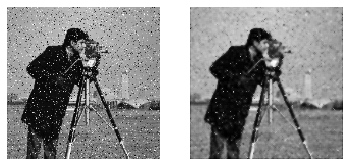

In [6]:
# compute f, applying the method M to the image r

#Method 1 - Bilateral Filter-----------------------------------------------------------------------------
if method == 1: 
    n = int(input())
    s = float(input())
    r = float(input())
    
    output_img = bilatteral_filter(input_img, n, r, s)
  
    
#Method 2 - unsharp mask using the laplacian filter------------------------------------------------------
elif method == 2:
    c = float(input())
    kernel = int(input())
    
    output_img = unsharp_mask_filter(input_img, c, kernel)
    
#Method 3 - Vignette Filter ---------------------------------------------------------------------------
elif method == 3:
    s_row = float(input())
    s_col = float(input())
    
    output_img = vignette_filter(input_img, s_row, s_col)


# defines a panel to show the images side by side------------------------------------------------------
plt.subplot(121) # panel with 1 row, 2 columns, to show the image at the first (1st) position
plt.imshow(input_img, cmap="gray")
plt.axis('off') # remove axis with numbers
plt.subplot(122) # panel with 1 row, 2 columns, to show the image at the first (2nd) position
plt.imshow(output_img, cmap="gray")
plt.axis('off') # remove axis with numbers

### compare f with the reference r

In [7]:
#print in the screen the root squared error between f and r
rse = np.sqrt(np.sum((output_img - input_img)**2))
print("%.4f" % rse)

3426.2696


In [8]:
#save the filtered image f, if S = 1
if save == 1:
    output_img = output_img.astype(np.uint8)
    imageio.imwrite('output_img.png', output_img)